In [1]:
words = open('data/names.txt', 'r').read().splitlines()
print(words[:10])

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [2]:
len(words)

32033

In [3]:
min (len(w) for w in words)

2

In [4]:
max (len(w) for w in words)

15

In [5]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [6]:
sorted(b.items(), key=lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [7]:
import torch

In [8]:
N = torch.zeros((28, 28), dtype=torch.int32)

In [9]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [10]:
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [11]:

for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
        

In [12]:
itos = {i:s for s,i in stoi.items()}

In [16]:
type(N[3,3].item())

int

(-0.5, 27.5, 27.5, -0.5)

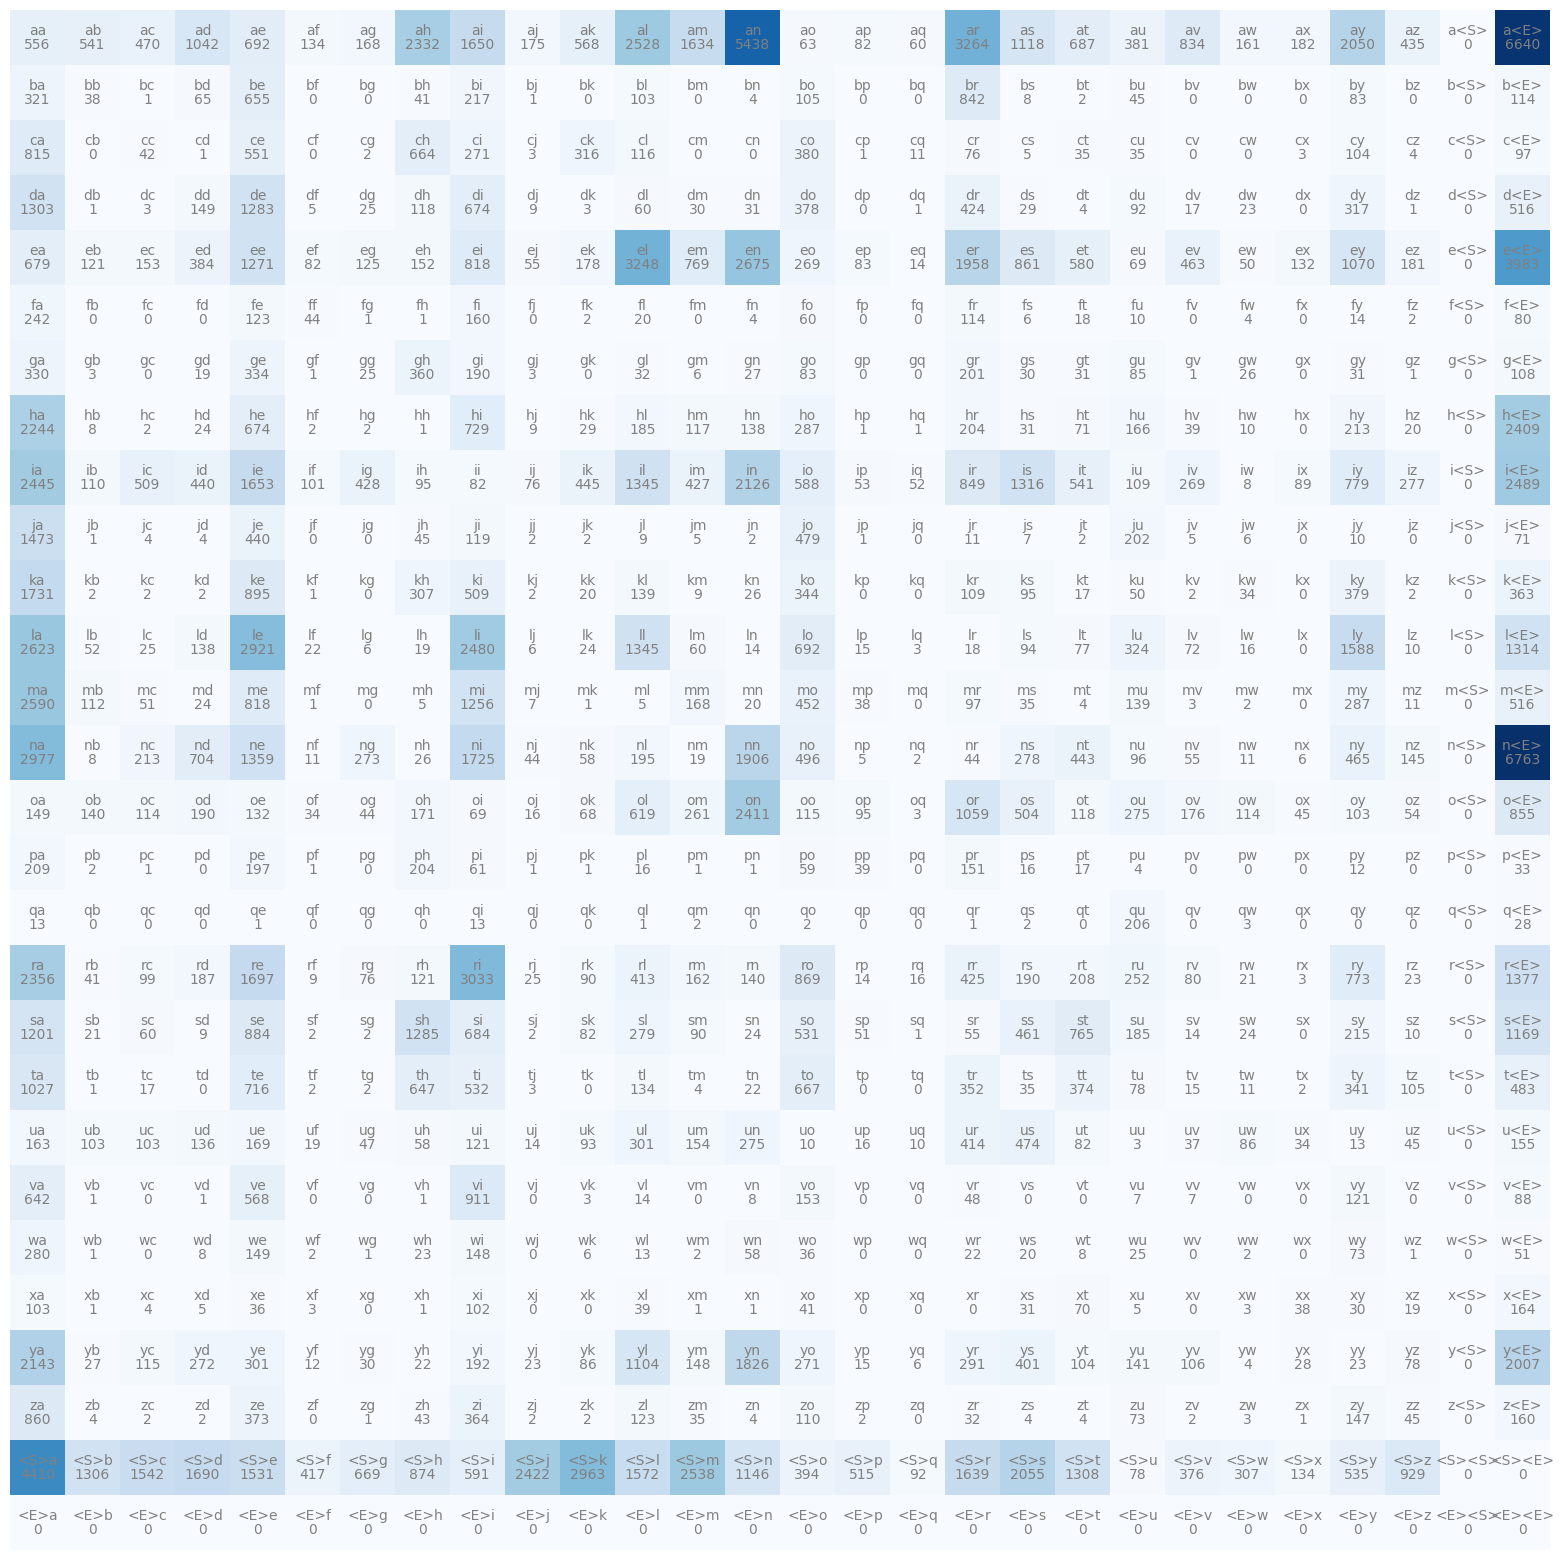

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,20))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i,j].item(), ha='center', va='top', color='gray')
plt.axis('off')

### Transform to use . instead of <S> and <E>

In [31]:
N = torch.zeros((27, 27), dtype=torch.int32)
N[1, 0]

tensor(0, dtype=torch.int32)

In [36]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [37]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

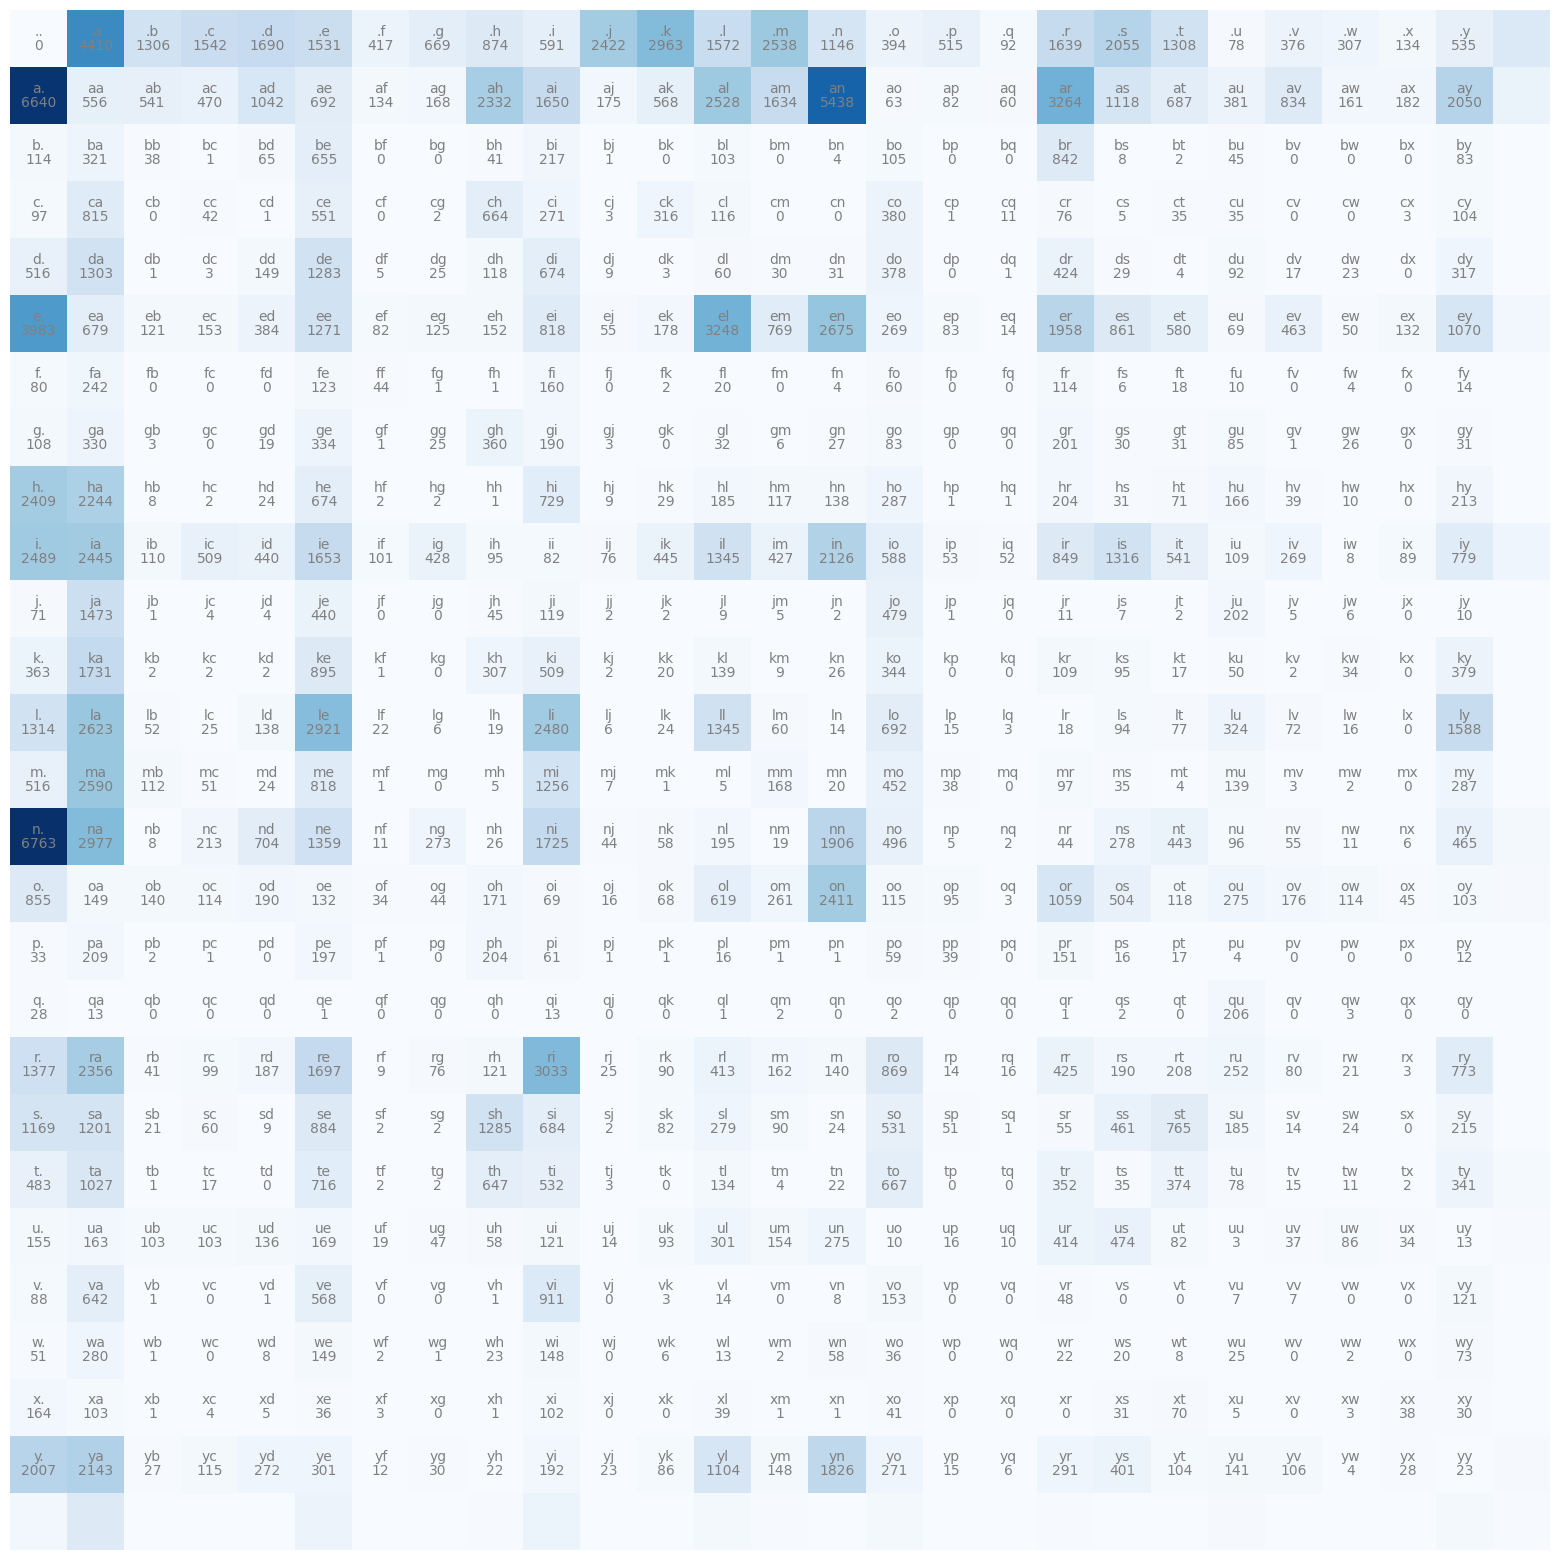

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,20))
plt.imshow(N, cmap='Blues')
for i in range(26):
    for j in range(26):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i,j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [43]:
g = torch.Generator().manual_seed(42)

for i in range(10):

    out = []
    ix = 0
    while True:
        probs = N[ix].float()
        probs /= probs.sum()
        # probs = torch.ones(27) / 27.0
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

anugeenvi.
s.
mabian.
dan.
stan.
silaylelaremah.
li.
le.
epiachalen.
diza.


In [55]:
# Another approach

# P = N.float()
P = (N + 1).float()   # Laplace smoothing
# P.sum(1, keepdim=True).shape
P /= P.sum(dim=1, keepdim=True)
P[0].sum()

tensor(1.)

In [56]:
g = torch.Generator().manual_seed(42)

for i in range(10):

    out = []
    ix = 0
    while True:
        probs = P[ix].float()
        probs /= probs.sum()
        # probs = torch.ones(27) / 27.0
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

anugeenvi.
s.
mabidushan.
stan.
silaylelaremah.
li.
le.
epiachalen.
diza.
k.


**Finding scoring function**
Negative log likelihood
$$
\begin{align}
\mathcal{L}(\theta) &= -\log p_\theta(x) \\
&= -\log \prod_{t=1}^T p_\theta(x_t | x_{<t}) \\
&= -\sum_{t=1}^T \log p_\theta(x_t | x_{<t}) \\
&= -\sum_{t=1}^T \log \frac{e^{f_\theta(x_t | x_{<t})}}{\sum_{x_t'} e^{f_\theta(x_t' | x_{<t})}} \\
&= -\sum_{t=1}^T \left( f_\theta(x_t | x_{<t}) - \log \sum_{x_t'} e^{f_\theta(x_t' | x_{<t})} \right) \\
\end{align}

In [57]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1} -> {ch2} : {prob:.3f} ({logprob:.3f})')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n:.3f}')   # Normalized negative log likelihood

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.454


## Constructing NN

In [58]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [63]:
print(xs)
print(ys)
# every input of x gives an index of the most likely output in y

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [67]:
# One hot encoding
from torch.nn.functional import one_hot

xenc = one_hot(xs, num_classes=27).float()
xenc.shape

torch.Size([5, 27])

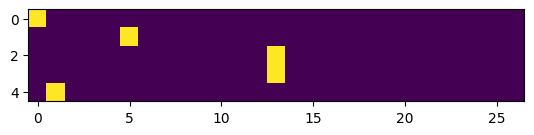

In [68]:
plt.imshow(xenc)

In [87]:
# Initialize weights
g = torch.Generator().manual_seed(42)
W = torch.randn((27, 27), generator=g)

In [90]:
# Forward pass
xenc @ W
(xenc @ W)[3, 13]
logits = (xenc @ W)   # Logits are log counts
counts = logits.exp()
probs = counts / counts.sum(dim=1, keepdim=True)

In [91]:
# probs
# probs[3].sum()
probs.shape

torch.Size([5, 27])

In [86]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    print('----------')
    print(f'{itos[x]} -> {itos[y]}')
    print(f'{probs[i]}')
    p = probs[i, y]
    print(f'probability {p}')
    logp = torch.log(p)
    nll = -logp
    print(f'negative log likelihood {nll}')
    nlls[i] = nll

print('==========')
print(f'Average negative log likelihood {nlls.mean().item()}')

----------
. -> e
tensor([0.1230, 0.0793, 0.0441, 0.0022, 0.0353, 0.0052, 0.0172, 0.0036, 0.0084,
        0.0932, 0.0121, 0.0044, 0.0087, 0.0102, 0.0083, 0.0384, 0.0926, 0.0153,
        0.0109, 0.0278, 0.0084, 0.0527, 0.0399, 0.0962, 0.0644, 0.0655, 0.0330])
probability 0.005211981013417244
negative log likelihood 5.256795406341553
----------
e -> m
tensor([0.0396, 0.0698, 0.0227, 0.0037, 0.0562, 0.0153, 0.0626, 0.0112, 0.0421,
        0.0084, 0.0581, 0.1125, 0.0951, 0.0292, 0.0181, 0.0107, 0.0247, 0.0316,
        0.0586, 0.0140, 0.1109, 0.0019, 0.0147, 0.0067, 0.0502, 0.0033, 0.0280])
probability 0.029175996780395508
negative log likelihood 3.5344090461730957
----------
m -> m
tensor([0.0123, 0.0078, 0.0250, 0.0187, 0.0050, 0.0125, 0.0074, 0.0099, 0.1254,
        0.1147, 0.0934, 0.0176, 0.0144, 0.0029, 0.0085, 0.0116, 0.1132, 0.0138,
        0.0203, 0.1464, 0.0943, 0.0242, 0.0326, 0.0140, 0.0340, 0.0149, 0.0053])
probability 0.0029116913210600615
negative log likelihood 5.839021205902

In [99]:
# Initialize weights
g = torch.Generator().manual_seed(42)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [118]:
# Forward pass
xenc = one_hot(xs, num_classes=27).float()
logits = xenc @ W   # Logits are log counts
counts = logits.exp()
probs = counts / counts.sum(dim=1, keepdim=True)
loss = -probs[torch.arange(5), ys].log().mean()

In [119]:
print(loss.item())

4.308952808380127


In [116]:
# Backward pass
W.grad = None
loss.backward()

In [117]:
W.data += -0.1 * W.grad

### After optimization

In [130]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)


number of examples:  228146


In [131]:
# gradient descent
for k in range(100):
  
  # forward pass
  xenc = one_hot(xs, num_classes=27).float()   # input to the network: one-hot encoding
  logits = xenc @ W   # predict log-counts
  counts = logits.exp()   # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True)   # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None   # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.768618583679199
3.3788065910339355
3.161090850830078
3.027186155319214
2.9344842433929443
2.867231607437134
2.8166542053222656
2.777146339416504
2.7452542781829834
2.7188305854797363
2.696505308151245
2.6773722171783447
2.6608054637908936
2.6463515758514404
2.633664846420288
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794916152954
2.5886809825897217
2.5822560787200928
2.576429843902588
2.5711236000061035
2.566272735595703
2.5618228912353516
2.5577263832092285
2.5539441108703613
2.5504424571990967
2.5471925735473633
2.5441696643829346
2.5413525104522705
2.538721799850464
2.536262035369873
2.5339579582214355
2.5317976474761963
2.5297679901123047
2.527860164642334
2.5260636806488037
2.5243704319000244
2.522773027420044
2.521263837814331
2.519836902618408
2.5184857845306396
2.5172054767608643
2.515990734100342
2.5148372650146484
2.5137407779693604
2.51269793510437
2.511704921722412
2.5107579231262207
2.509854793548584
2.5089924335479736
2.5081682205200195
2.5073804855346

In [132]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W   # predict log-counts
    counts = logits.exp()   # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True)   # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.
